# Plot energy band

In [ ]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('../style/sci.mplstyle')
import numpy as np

# The Fermi energy, find it in scf.out
efermi = 5.9602

# Load data from Si.bands.gnu
data = np.loadtxt('Si.bands.gnu')
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))
    
# Set high-symmetry points from nscf.in
L = k[0]; G1 = k[10]; X = k[20]; U = k[30]; G2 = k[40]

# Create figure object
plt.figure()
# Plot dotted line at Fermi energy
plt.axhline(0, c='gray', ls=':')
# Plot dotted lines at high-symmetry points
plt.axvline(K, c='gray')
plt.axvline(M, c='gray')

# Plot band structure
for band in range(len(bands)):
    plt.plot(k, bands[band, :]-efermi, color='blue')

# Add the x and y-axis labels
plt.xlabel('')
plt.ylabel('Energy (eV)')
# Set the axis limits
plt.xlim(L, G2)
plt.ylim (-20, 20)
# Add labels for high-symmetry points
plt.xticks([L, G1, X, U, G2], ['L', '$\Gamma$', 'X', 'U', '$\Gamma$'])
# Hide x-axis minor ticks
plt.tick_params(axis='x', which='minor', bottom=False, top=False)
# Save figure to the pdf file
plt.savefig('plot-ebands.pdf', bbox_inches='tight')

# Plot DOS

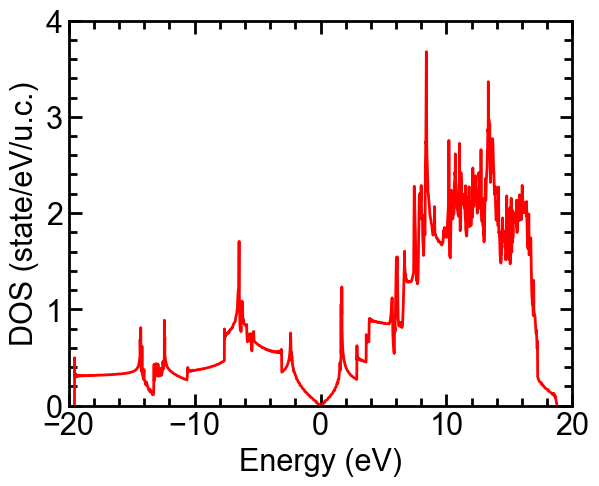

In [3]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('../style/sci.mplstyle')
import numpy as np

# The Fermi energy, find it in header row of gr.dos
efermi = -1.724

# Open and read the file gr.dos
ener, dos, idos = np.loadtxt('data/gr.dos', unpack=True)
    
# Create figure object
plt.figure()
# Plot the DOS, in which the Fermi energy shifts to zero
plt.plot(ener-efermi, dos, color='red')
# Add the x and y-axis labels
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (state/eV/u.c.)')
# Set the axis limits
plt.xlim(-20, 20)
plt.ylim(0, 4)
# Save the figure to the pdf file
plt.savefig('plot-dos.pdf', bbox_inches='tight')

# Combine the band structure and DOS plots

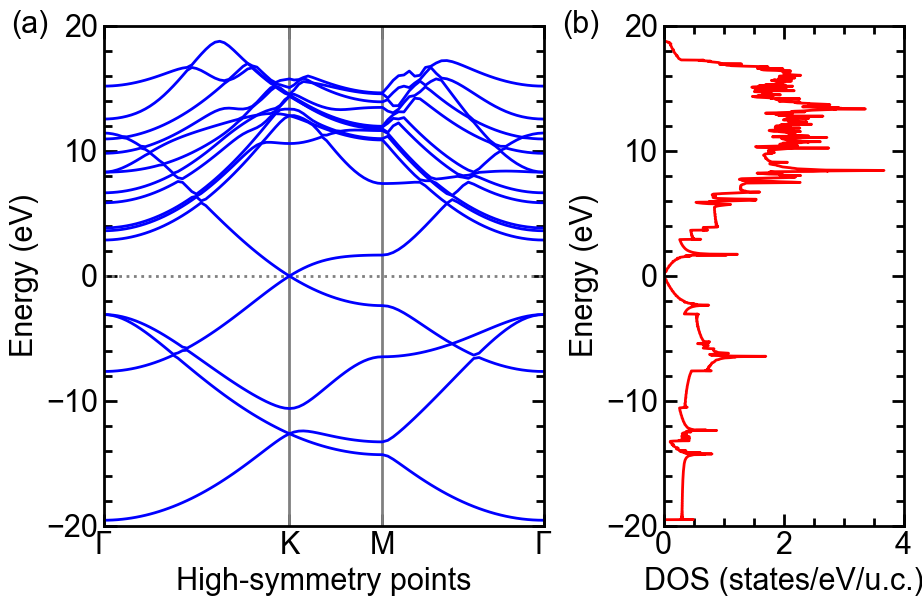

In [1]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('../style/sci.mplstyle')
import numpy as np
import matplotlib as mpl

# Initialize figure
fig = plt.figure(figsize=(8, 5))

# Add two axes objects to create a paneled figure
# format: (originX, originY, widthX, widthY)
axBand = fig.add_axes([0,    0, 0.55, 1])
axDOS  = fig.add_axes([0.70, 0, 0.30, 1])

# PLOT EBANDS

# The Fermi energy, find it in scf.out
efermi = -1.6790 

# Load data from gr.bands.gnu
data = np.loadtxt('data/gr.bands.gnu')
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))
    
# Set high-symmetry points from nscf.in
G1 = k[0]; K = k[40]; M = k[60]; G2 = k[90]

# Plot dotted line at Fermi energy
axBand.axhline(0, c='gray', ls=':')
# Plot dotted lines at high-symmetry points
axBand.axvline(K, c='gray')
axBand.axvline(M, c='gray')

# Plot band structure
for band in range(len(bands)):
    axBand.plot(k, bands[band, :]-efermi, c='b')

# Add the x and y-axis labels
axBand.set_xlabel('High-symmetry points')
axBand.set_ylabel('Energy (eV)')
# Set the axis limits
axBand.set_xlim(G1, G2)
axBand.set_ylim (-20, 20)
# Add labels for high-symmetry points
axBand.set_xticks([G1, K, M, G2], ['$\Gamma$', 'K', 'M', '$\Gamma$'])
# Hide x-axis minor ticks
axBand.tick_params(axis='x', which='minor', bottom=False, top=False)
# Better ticks for y-axis
axBand.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
axBand.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))

# PLOT DOS

# The Fermi energy, find it in header row of gr.dos
efermi = -1.724

# Open and read the file gr.dos
ener, dos, idos = np.loadtxt('data/gr.dos', unpack=True)
    
# Plot the DOS, in which the Fermi energy shifts to zero
axDOS.plot(dos, ener-efermi, color='red')

# Add the x and y-axis labels
axDOS.set_xlabel('DOS (states/eV/u.c.)')
axDOS.set_ylabel('Energy (eV)')
# Set the axis limits
axDOS.set_xlim(0,4)
axDOS.set_ylim(-20, 20)
# Better ticks for y-axis
axDOS.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
axDOS.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))

# ADD PANEL LABELS (a) AND (b)
axBand.text(-0.33, 19.4,'(a)')
axDOS.text( -1.69, 19.4,'(b)')

plt.savefig('plot-merge.pdf', bbox_inches='tight')